### 👉 Fraud Detection in Credit Card Transactions using Synthetic Minority Oversampling Technique (SMOTE)  

### 👉 Introduction
The objective in this project is to build machine learning models to classify or identify fraudulent card transactions from a given card transactions data.  

### 👉 Data Description

The dataset contains two-days credit card transactions made in September 2013 by European cardholders. The dataset is highly unbalanced with a low percentage of fraudulent transactions within several records of normal transactions. The positive class (frauds) account for 0.172% (492 frauds out of 284,807 transactions) of all transactions.

Features V1, V2, ... V28 are the principal components. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. Feature 'Class' is the target variable with value 1 in case of fraud and 0 for normal transaction.

### 👉 Importing Libraries

In [110]:
# Import basic libraries 
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")
# settings
%matplotlib inline
sn.set_style("dark")
sn.set_palette("colorblind")

### 👉 Reading the dataset

In [92]:
df = pd.read_csv("creditcard.csv")

### 👉 Fetching the top 5 records of the dataset

In [93]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 👉 determine the number of records (Rows and Columns)in the dataset

In [94]:
 print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 284807 rows and 31 columns.


### 👉 checking for missing values and data types of the columns

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 👉 checking for missing values 

In [114]:
# As we can seee that no missing value we can found
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### 👉 Explore label class

In [96]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


### 👉 Separate feature data (predictors) from labels

In [97]:
# feature data (predictors)
X = df.iloc[:, :-1]

# label class
y = df['Class']

### 👉 Standardize data
Scale the data to have zero mean and unit variance.

In [98]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### 👉  Partition data into train and test sets

In [99]:
# Partition data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state = 42)

In [100]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

### 👉 Visualization of the of the Fraud transactions and Normal Transactions Before Re-Sampling

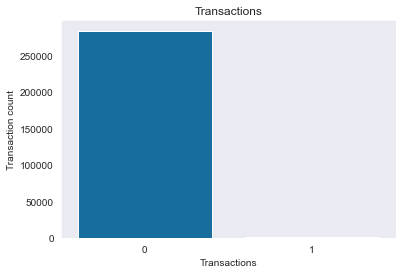

In [140]:
#sn.countplot(data=y_res, AxesSubplot:xlabel='Class', ylabel='count')
plot_before_resampling = sn.countplot(y);
plot_before_resampling.set(title='Transactions', xlabel='Transactions', ylabel='Transaction count')
plot_before_resampling;

### 👉 Data Sampling  
SMOTE is shorthand for Synthetic Minority Oversampling Technique. It was published in 2002 N. V. Chawla et al. It is used to generate synthetic data where actual occurrence of the data is going to be low. Similar to fraud in normal banking transaction data. This is useful when training models to avoid bias in training of AI.

In [105]:
# Apply the SMOTE over-sampling
smote = SMOTE(random_state = 42)
print('Before SMOTE Oversampling Original dataset shape {}'.format(Counter(y_train)))


X_res, y_res = smote.fit_resample(X_train, y_train)
print('After SMOTE Resampled dataset shape {}'.format(Counter(y_res)))

Before SMOTE Oversampling Original dataset shape Counter({0: 190477, 1: 343})
After SMOTE Resampled dataset shape Counter({0: 190477, 1: 190477})


### 👉 Visualization of the of the Fraud transactions and Normal Transactions After Re-Sampling

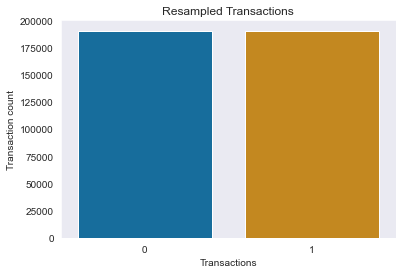

In [139]:
#sn.countplot(data=y_res, AxesSubplot:xlabel='Class', ylabel='count')
res_plot = sn.countplot(y_res)
res_plot.set(title='Resampled Transactions', xlabel='Transactions', ylabel='Transaction count')
res_plot;